# linear regression with **R**

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
station_data <- read_csv(file.path('data', 'combined_stations.csv'))

Rows: 7617 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): season, station
dbl  (7): year, month, tmax, tmin, air_frost, rain, sun
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
station_data |> 
    group_by(station, year) |>
    summarize(
        tmax_mean = mean(tmax, na.rm = TRUE),
        tmax_std = sd(tmax, na.rm = TRUE),
        tmin_mean = mean(tmin, na.rm = TRUE),
        tmin_std = sd(tmin, na.rm = TRUE),
        tmax_med = median(tmax, na.rm = TRUE),
        tmin_med = median(tmin, na.rm = TRUE),
        rain = sum(rain, na.rm = TRUE)
    ) -> summary_data

print(summary_data)

`summarise()` has grouped output by 'station'. You can override using the `.groups` argument.


# A tibble: 636 × 9
# Groups:   station [4]
   station  year tmax_mean tmax_std tmin_mean tmin_std tmax_med tmin_med  rain
   <chr>   <dbl>     <dbl>    <dbl>     <dbl>    <dbl>    <dbl>    <dbl> <dbl>
 1 armagh   1853       NaN       NA       NaN       NA       NA       NA  636.
 2 armagh   1854       NaN       NA       NaN       NA       NA       NA  837.
 3 armagh   1855       NaN       NA       NaN       NA       NA       NA  603.
 4 armagh   1856       NaN       NA       NaN       NA       NA       NA  660.
 5 armagh   1857       NaN       NA       NaN       NA       NA       NA  775.
 6 armagh   1858       NaN       NA       NaN       NA       NA       NA  736.
 7 armagh   1859       NaN       NA       NaN       NA       NA       NA  697.
 8 armagh   1860       NaN       NA       NaN       NA       NA       NA  722.
 9 armagh   1861       NaN       NA       NaN       NA       NA       NA 1055.
10 armagh   1862       NaN       NA       NaN       NA       NA       NA  946.
# ℹ 626 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


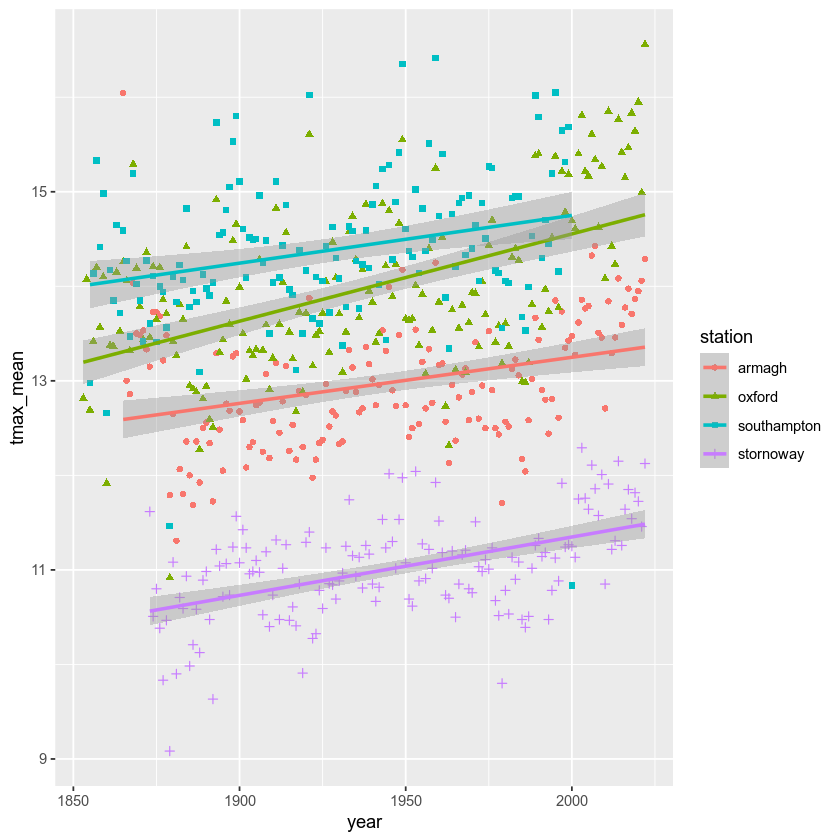

In [7]:
ggplot(data=summary_data, mapping=aes(x=year, y=tmax_mean)) + 
    geom_point(mapping=aes(color=station, shape=station)) + 
    geom_smooth(mapping=aes(color=station), method='lm')

In [15]:
summary_data |> filter(station == 'oxford') -> oxford_data

oxford_tmax_lm <- lm(tmax_mean~year, data=oxford_data)

In [16]:
summary(oxford_tmax_lm)


Call:
lm(formula = tmax_mean ~ year, data = oxford_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52038 -0.53778 -0.03536  0.62820  1.95620 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.914301   2.312232  -1.693   0.0923 .  
year         0.009234   0.001193   7.740 8.82e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7634 on 168 degrees of freedom
Multiple R-squared:  0.2629,	Adjusted R-squared:  0.2585 
F-statistic: 59.91 on 1 and 168 DF,  p-value: 8.82e-13
